# JAVELIKE Test
Generates posteriors for lag + logtau for a single mock using AEIS and HS. Used for demonstrating aliasing failure mode.

In [1]:

from litmus import *
from litmus._utils import dict_extend

# -------------------
SAVECHAINS = True
SAVEFIGURES = True
# -------------------


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


First we use the `mocks` module to generate some mock data

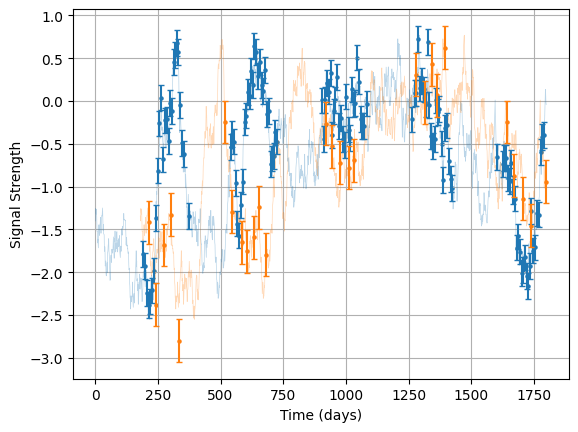

In [2]:
mock = mocks.mock(lag=180, cadende = [10,30], E = [0.15, 0.25], tau = 200)
mock = mock(10)
lc_1, lc_2 = mock.lc_1, mock.lc_2
mock.plot(show=True)
plt.show()

Now, make a model and get the data:

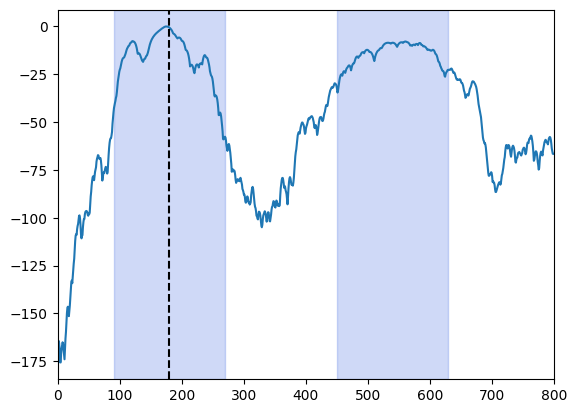

In [3]:
model = models.GP_simple()
model.set_priors({
    'lag': [0, 800],
    'mean': [0.0, 0.0],
    'rel_mean': [0.0, 0.0],
    'rel_amp': [1.00, 1.00],
})
data = model.lc_to_data(lc_1, lc_2)

if mock.season != 0:
    tmax = model.prior_ranges['lag'][1]
    nyears = int(tmax // (mock.season * 2) + 1)
    for i in range(nyears):
        plt.axvspan((i + 1 / 2 - 1 / 4) * mock.season * 2, (i + 1 - 1 / 4) * mock.season * 2,
                    ymin=0, ymax=1, alpha=0.25, color='royalblue',
                    zorder=-10,
                    label="Aliasing Seasons" if i == 0 else None)
lagplot = np.linspace(*model.prior_ranges['lag'], 1024)
LLs = model.log_density(dict_extend(mock.params(), {'lag': lagplot}), data)
plt.plot(lagplot, (LLs - LLs.max()))
plt.axvline(mock.lag, ls='--', c='k')
plt.xlim(0, model.prior_ranges['lag'][1])
plt.show()




awgawgawgagawg

In [4]:
meth_1 = fitting_methods.JAVELIKE(model,
                                verbose=True,
                                debug=True,
                                num_warmup = 5_000,
                                num_samples = 100_000//512,
                                num_chains = 512
                                )

meth_2 = fitting_methods.hessian_scan(model,
                                      verbose=True,
                                      debug=True,
                                      Nlags=64,
                                      precondition="half-eig",
                                      reverse=False
                                      )

TypeError: logger.__init__() missing 1 required positional argument: 'self'

wfaagawg

In [ ]:
print("Plots!")
for meth, name in zip([meth_1, meth_2], ["javelin", 'hessian']):
    print(name)
    #meth.prefit(lc_1, lc_2)
    #meth.fit(lc_1, lc_2)

    lt = LITMUS(meth)
    if SAVECHAINS: lt.save_chain("./chain_%s.csv" % name)
    lt.lag_plot(dir="./lagplot_%s.pdf" % name if SAVEFIGURES else None)

dddd